## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個二層隱藏層的神經網路
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [5]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD()
model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'], optimizer= optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 12s 250us/step - loss: 2.0437 - accuracy: 0.2741 - val_loss: 1.9171 - val_accuracy: 0.3125
Epoch 2/500
50000/50000 [==============================] - 12s 245us/step - loss: 1.8725 - accuracy: 0.3427 - val_loss: 1.8968 - val_accuracy: 0.3223
Epoch 3/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.8104 - accuracy: 0.3640 - val_loss: 1.7983 - val_accuracy: 0.3758
Epoch 4/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.7671 - accuracy: 0.3825 - val_loss: 1.7832 - val_accuracy: 0.3565
Epoch 5/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.7342 - accuracy: 0.3957 - val_loss: 1.7348 - val_accuracy: 0.3880
Epoch 6/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.7040 - accuracy: 0.4078 - val_loss: 1.7011 - val_accuracy: 0.4058
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.2646 - accuracy: 0.5581 - val_loss: 1.4980 - val_accuracy: 0.4602
Epoch 56/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.2495 - accuracy: 0.5627 - val_loss: 1.4751 - val_accuracy: 0.4759
Epoch 57/500
50000/50000 [==============================] - 12s 250us/step - loss: 1.2485 - accuracy: 0.5625 - val_loss: 1.6396 - val_accuracy: 0.4181
Epoch 58/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.2402 - accuracy: 0.5675 - val_loss: 1.6859 - val_accuracy: 0.4332
Epoch 59/500
50000/50000 [==============================] - 13s 250us/step - loss: 1.2353 - accuracy: 0.5693 - val_loss: 1.4595 - val_accuracy: 0.4874
Epoch 60/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.2323 - accuracy: 0.5694 - val_loss: 1.3844 - val_accuracy: 0.5044
Epoch 61/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.2240 - ac

50000/50000 [==============================] - 12s 246us/step - loss: 1.0333 - accuracy: 0.6411 - val_loss: 1.3980 - val_accuracy: 0.5238
Epoch 109/500
50000/50000 [==============================] - 13s 250us/step - loss: 1.0281 - accuracy: 0.6438 - val_loss: 1.3689 - val_accuracy: 0.5146
Epoch 110/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.0126 - accuracy: 0.6471 - val_loss: 1.4471 - val_accuracy: 0.4975
Epoch 111/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.0129 - accuracy: 0.6460 - val_loss: 1.3639 - val_accuracy: 0.5290
Epoch 112/500
50000/50000 [==============================] - 13s 250us/step - loss: 1.0111 - accuracy: 0.6469 - val_loss: 1.3318 - val_accuracy: 0.5325
Epoch 113/500
50000/50000 [==============================] - 13s 250us/step - loss: 1.0145 - accuracy: 0.6474 - val_loss: 1.3223 - val_accuracy: 0.5281: 1.0143 - 
Epoch 114/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.9999 

Epoch 162/500
50000/50000 [==============================] - 12s 244us/step - loss: 0.8382 - accuracy: 0.7114 - val_loss: 1.6603 - val_accuracy: 0.4683
Epoch 163/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.8356 - accuracy: 0.7116 - val_loss: 1.4235 - val_accuracy: 0.5235
Epoch 164/500
50000/50000 [==============================] - 12s 242us/step - loss: 0.8323 - accuracy: 0.7135 - val_loss: 1.4978 - val_accuracy: 0.5126
Epoch 165/500
50000/50000 [==============================] - 12s 243us/step - loss: 0.8218 - accuracy: 0.7156 - val_loss: 1.5331 - val_accuracy: 0.5097
Epoch 166/500
50000/50000 [==============================] - 12s 243us/step - loss: 0.8308 - accuracy: 0.7126 - val_loss: 1.5395 - val_accuracy: 0.4964
Epoch 167/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.8246 - accuracy: 0.7185 - val_loss: 1.4846 - val_accuracy: 0.5094
Epoch 168/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.81

Epoch 216/500
50000/50000 [==============================] - 12s 243us/step - loss: 0.6642 - accuracy: 0.7750 - val_loss: 1.4540 - val_accuracy: 0.5386
Epoch 217/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.6637 - accuracy: 0.7747 - val_loss: 1.6411 - val_accuracy: 0.5042
Epoch 218/500
50000/50000 [==============================] - 12s 244us/step - loss: 0.6597 - accuracy: 0.7791 - val_loss: 1.7458 - val_accuracy: 0.4755
Epoch 219/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.6612 - accuracy: 0.7750 - val_loss: 1.4755 - val_accuracy: 0.5346
Epoch 220/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.6486 - accuracy: 0.7813 - val_loss: 1.5281 - val_accuracy: 0.5246
Epoch 221/500
50000/50000 [==============================] - 12s 242us/step - loss: 0.6578 - accuracy: 0.7783 - val_loss: 1.5147 - val_accuracy: 0.5235
Epoch 222/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.64

Epoch 270/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.5193 - accuracy: 0.8294 - val_loss: 1.5977 - val_accuracy: 0.5318
Epoch 271/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.5157 - accuracy: 0.8305 - val_loss: 1.5577 - val_accuracy: 0.5427
Epoch 272/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.5198 - accuracy: 0.8284 - val_loss: 1.6309 - val_accuracy: 0.5312
Epoch 273/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.5031 - accuracy: 0.8345 - val_loss: 1.8868 - val_accuracy: 0.4825
Epoch 274/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.5130 - accuracy: 0.8326 - val_loss: 1.8427 - val_accuracy: 0.4899
Epoch 275/500
50000/50000 [==============================] - 13s 250us/step - loss: 0.5022 - accuracy: 0.8356 - val_loss: 1.7258 - val_accuracy: 0.5232
Epoch 276/500
50000/50000 [==============================] - 13s 250us/step - loss: 0.50

50000/50000 [==============================] - 12s 245us/step - loss: 0.3783 - accuracy: 0.8824 - val_loss: 1.7778 - val_accuracy: 0.5259
Epoch 324/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.3975 - accuracy: 0.8721 - val_loss: 1.7248 - val_accuracy: 0.5229
Epoch 325/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.3959 - accuracy: 0.8775 - val_loss: 2.0655 - val_accuracy: 0.4735
Epoch 326/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.3601 - accuracy: 0.8895 - val_loss: 1.7130 - val_accuracy: 0.5388
Epoch 327/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.3766 - accuracy: 0.8861 - val_loss: 1.9111 - val_accuracy: 0.5069
Epoch 328/500
50000/50000 [==============================] - 12s 248us/step - loss: 0.3649 - accuracy: 0.8880 - val_loss: 2.1231 - val_accuracy: 0.4908
Epoch 329/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.3744 - accuracy:

Epoch 377/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.2519 - accuracy: 0.9300 - val_loss: 2.4961 - val_accuracy: 0.4786
Epoch 378/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.3024 - accuracy: 0.9193 - val_loss: 2.0410 - val_accuracy: 0.5087
Epoch 379/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.2794 - accuracy: 0.9234 - val_loss: 2.3131 - val_accuracy: 0.4828
Epoch 380/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.2761 - accuracy: 0.9236 - val_loss: 1.8289 - val_accuracy: 0.5502
Epoch 381/500
50000/50000 [==============================] - 13s 250us/step - loss: 0.2320 - accuracy: 0.9380 - val_loss: 2.8151 - val_accuracy: 0.4448
Epoch 382/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.3110 - accuracy: 0.9165 - val_loss: 1.8501 - val_accuracy: 0.5455
Epoch 383/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.25

Epoch 431/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.1656 - accuracy: 0.9633 - val_loss: 2.0288 - val_accuracy: 0.5373
Epoch 432/500
50000/50000 [==============================] - 12s 248us/step - loss: 0.2991 - accuracy: 0.9290 - val_loss: 1.9232 - val_accuracy: 0.5390
Epoch 433/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.1530 - accuracy: 0.9667 - val_loss: 2.0452 - val_accuracy: 0.5302
Epoch 434/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.1536 - accuracy: 0.9663 - val_loss: 1.9744 - val_accuracy: 0.5514
Epoch 435/500
50000/50000 [==============================] - 12s 248us/step - loss: 0.1620 - accuracy: 0.9619 - val_loss: 2.0297 - val_accuracy: 0.5449
Epoch 436/500
50000/50000 [==============================] - 12s 248us/step - loss: 0.1344 - accuracy: 0.9731 - val_loss: 2.0930 - val_accuracy: 0.5334
Epoch 437/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.17

50000/50000 [==============================] - 12s 248us/step - loss: 0.1188 - accuracy: 0.9756 - val_loss: 2.2046 - val_accuracy: 0.5429
Epoch 485/500
50000/50000 [==============================] - 12s 250us/step - loss: 0.1834 - accuracy: 0.9591 - val_loss: 2.1315 - val_accuracy: 0.5523
Epoch 486/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.0873 - accuracy: 0.9859 - val_loss: 2.1644 - val_accuracy: 0.5452
Epoch 487/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.0802 - accuracy: 0.9889 - val_loss: 2.1663 - val_accuracy: 0.5449
Epoch 488/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.2381 - accuracy: 0.9490 - val_loss: 2.1852 - val_accuracy: 0.5445
Epoch 489/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.0960 - accuracy: 0.9839 - val_loss: 2.1774 - val_accuracy: 0.5458
Epoch 490/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.0851 - accuracy:

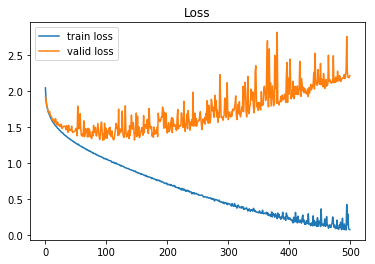

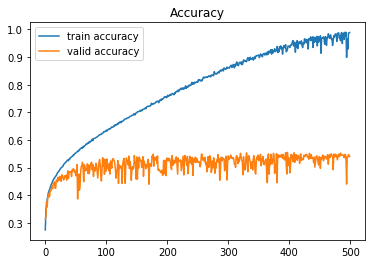

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()